# Bike Thefts Berlin - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH_INITIAL = '../data/Fahrraddiebstahl.csv' 
PATH_SAVEABLE = '../data'
PATH_EXTRACTED = './data'

In [3]:
time_parseable = ['TATZEIT_ANFANG_DATUM', 'TATZEIT_ENDE_DATUM']

## Prep data inspection

In [4]:
class BikeThefts():
    '''Read, inspect and transform initial data.'''

    def __init__(self, path = PATH_INITIAL, path_saveable = PATH_SAVEABLE, path_extracted = PATH_EXTRACTED) -> None:
        self.path = path
        self.path_saveable = path_saveable
        self.path_extracted = path_extracted

    def read_initial_data(self) -> pd.DataFrame:
        '''Return DataFrame with feature matrix and labels as values.'''
        df = pd.read_csv(self.path, index_col=0, parse_dates=True, encoding = 'unicode_escape')
        return df

    def read_extracted_data(self, file) -> pd.DataFrame:
        '''Return DataFrame extracted from initial data.'''
        df = pd.read_csv(f'{self.path_extracted}/{file}', encoding = 'unicode_escape')
        return df
    
    def check_unique(self, serie) -> pd.Series:
        '''Return unique values of selected columns.'''
        return serie.unique()

    def include_timestamps(self, df) -> pd.DataFrame:
        '''Return DataFrame with time-stamps.'''
        df['year'] = df.index.year
        df['month'] = df.index.month
        return df

    def time_parser(self, df, time_parsables) -> pd.DataFrame:
        '''Parse columns encoded as strings to datetime-objects.'''
        for col in time_parsables:
            df[col] = pd.to_datetime(df[col])
        return df

    def crime_duration_days(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in days.'''
        df['crime_duration_days'] = end - start
        return df
    
    def crime_duration_hours(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in hours.'''
        df['crime_duration_hours'] = abs(start - end)
        return df
    
    def plot_categoricals(self, df, ordinate) -> sns:
        return sns.catplot(
        data=df, y=ordinate, kind="count",
        palette="pastel", edgecolor=".6",
    )

    def save_data(self, df, group_by, col_names, file):
        '''Save extracted data locally as csv-file.'''
        bike_thefts_LOR = pd.DataFrame(df.groupby(group_by).size(),
                        columns = [col_names]).reset_index()
        return bike_thefts_LOR.to_csv(f'{self.path_saveable}/{file}.csv')

## Inspect

In [5]:
bike_thefts = BikeThefts()

In [6]:
df = bike_thefts.read_initial_data()
df.head()

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
ANGELEGT_AM,,,,,,,,,,
2023-02-19,18.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,16,19.02.2023,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,17,19.02.2023,0,7601544,1849,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,17.02.2023,17,17.02.2023,17,3601346,1863,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [7]:
df.info() # dates are encoded as strings

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-19 to 2022-01-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TATZEIT_ANFANG_DATUM   24610 non-null  object
 1   TATZEIT_ANFANG_STUNDE  24610 non-null  int64 
 2   TATZEIT_ENDE_DATUM     24610 non-null  object
 3   TATZEIT_ENDE_STUNDE    24610 non-null  int64 
 4   LOR                    24610 non-null  int64 
 5   SCHADENSHOEHE          24610 non-null  int64 
 6   VERSUCH                24610 non-null  object
 7   ART_DES_FAHRRADS       24610 non-null  object
 8   DELIKT                 24610 non-null  object
 9   ERFASSUNGSGRUND        24610 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [8]:
df.isna().sum().sum()

0

In [9]:
bike_thefts.check_unique(df['DELIKT'])

array(['Fahrraddiebstahl', 'Keller- und Bodeneinbruch'], dtype=object)

In [10]:
bike_thefts.check_unique(df['ART_DES_FAHRRADS'])

array(['Herrenfahrrad', 'Damenfahrrad', 'Mountainbike',
       'diverse Fahrräder', 'Fahrrad', 'Kinderfahrrad', 'Rennrad',
       'Lastenfahrrad'], dtype=object)

In [11]:
len(bike_thefts.check_unique(df['LOR']))

540

In [12]:
bike_thefts.check_unique(df['VERSUCH']) 

array(['Nein', 'Unbekannt', 'Ja'], dtype=object)

In [13]:
len(df[df['VERSUCH']== 'Unbekannt']) # decision: include or drop?

5

In [14]:
bike_thefts.check_unique(df['ERFASSUNGSGRUND'])

array(['Sonstiger schwerer Diebstahl von Fahrrädern',
       'Einfacher Diebstahl von Fahrrädern',
       'Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern',
       'Einfacher Diebstahl aus Keller/Boden von Fahrrädern'],
      dtype=object)

## Parse time

In [15]:
df_transformed = bike_thefts.time_parser(df, time_parseable)
#df_transformed = bike_thefts.include_timestamps(df_transformed)
df_transformed.head(3)

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
ANGELEGT_AM,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,16,2023-02-19,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [16]:
df_transformed = bike_thefts.crime_duration_days(df_transformed, 
                                            start=df_transformed['TATZEIT_ANFANG_DATUM'], 
                                            end = df_transformed['TATZEIT_ENDE_DATUM'])

In [17]:
df_transformed = bike_thefts.crime_duration_hours(df_transformed, 
                                            start=df_transformed['TATZEIT_ANFANG_STUNDE'], 
                                            end = df_transformed['TATZEIT_ENDE_STUNDE'])
df_transformed.head(2)

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours
ANGELEGT_AM,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11


In [18]:
df_transformed = bike_thefts.include_timestamps(df)

## Extract dataframes for individual years

In [19]:
extract_2022 = df_transformed.loc['2022-01-01':'2022-12-31']
extract_2022.head(2)

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2022-12-31,2022-12-26,20,2022-12-27,9,3400724,270,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2022,12
2022-12-31,2022-12-30,14,2022-12-31,9,1401048,690,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,5,2022,12


In [20]:
extract_2023 = df_transformed.loc['2023-01-01':'2023-02-19']
extract_2023.head(2)

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


## Extract series for individual years and plot numeric data

In [21]:
extract_2022.reset_index(inplace=True)
extract_2022.head(2)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours,year,month
0,2022-12-31,2022-12-26,20,2022-12-27,9,3400724,270,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2022,12
1,2022-12-31,2022-12-30,14,2022-12-31,9,1401048,690,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,5,2022,12


In [22]:
bike_thefts_series_22 = pd.DataFrame(extract_2022.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_22 = bike_thefts_series_22.set_index(bike_thefts_series_22['ANGELEGT_AM'])
bike_thefts_series_22 = bike_thefts_series_22['bike_theft_count']

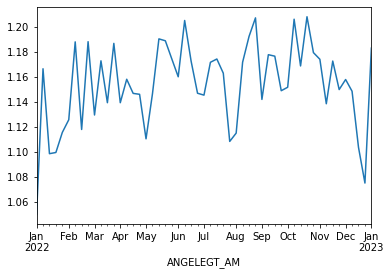

In [23]:
(bike_thefts_series_22
.resample('W')  #change frequency
.mean()
.plot.line()
);

In [24]:
bike_thefts_series_22.isna().sum().sum()

0

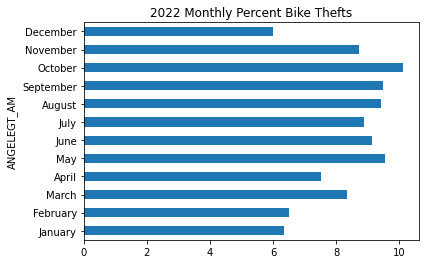

In [25]:
(bike_thefts_series_22
 .resample('M')
 .sum()
 .div(bike_thefts_series_22.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2022 Monthly Percent Bike Thefts')
 );

In [26]:
extract_2023.reset_index(inplace=True)
extract_2023.head(2)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours,year,month
0,2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
1,2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [27]:
bike_thefts_series_23 = pd.DataFrame(extract_2023.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_23 = bike_thefts_series_23.set_index(bike_thefts_series_23['ANGELEGT_AM'])
bike_thefts_series_23 = bike_thefts_series_23['bike_theft_count']

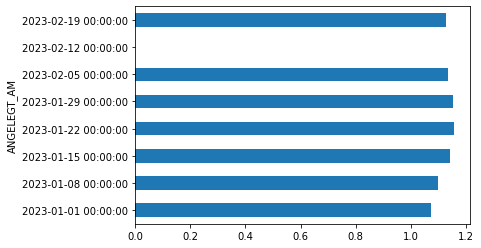

In [28]:
(bike_thefts_series_23
.resample('W')
.mean()
.plot.barh()
);

In [29]:
bike_thefts_series_23.isna().sum().sum()

0

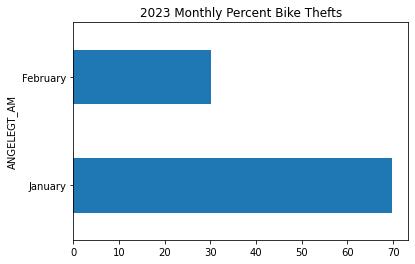

In [30]:
(bike_thefts_series_23
 .resample('M')
 .sum()
 .div(bike_thefts_series_23.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2023 Monthly Percent Bike Thefts')
 );

In [31]:
df_transformed.drop(df_transformed.iloc[:, 0:4], axis=1, inplace=True)
df_transformed.head(2)

,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,
2023-02-19,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [32]:
bike_thefts.check_unique(df_transformed['crime_duration_hours'])  # check: can this be so long?

array([11, 16, 17,  0, 10, 22,  4,  1,  9,  2,  7,  5,  3,  6, 23,  8, 20,
       14, 12, 13, 15, 19, 18, 21])

In [33]:
df_transformed.reset_index(inplace=True)
df_transformed.head(2)

,ANGELEGT_AM,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,crime_duration_days,crime_duration_hours,year,month
0,2023-02-19,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
1,2023-02-19,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [34]:
bike_thefts_LOR_year = pd.DataFrame(df_transformed.groupby(['LOR', 'year']).size(),
                       columns = ['bike_theft_count'])
bike_thefts_LOR_year = bike_thefts_LOR_year.reset_index()
bike_thefts_LOR_year = bike_thefts_LOR_year.set_index('year').reset_index()
bike_thefts_LOR_year.head(2)

,year,LOR,bike_theft_count
0,2022,1100101,26
1,2023,1100101,2


In [35]:
bike_thefts.save_data(
    df = bike_thefts_LOR_year, 
    group_by =['LOR', 'year'],
    col_names='bike_theft_count',
    file = 'bike_thefts_year_LOR_count'
    )

## Plot categoricals

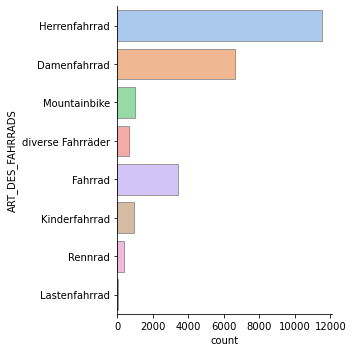

In [36]:
bike_thefts.plot_categoricals(df, 'ART_DES_FAHRRADS');

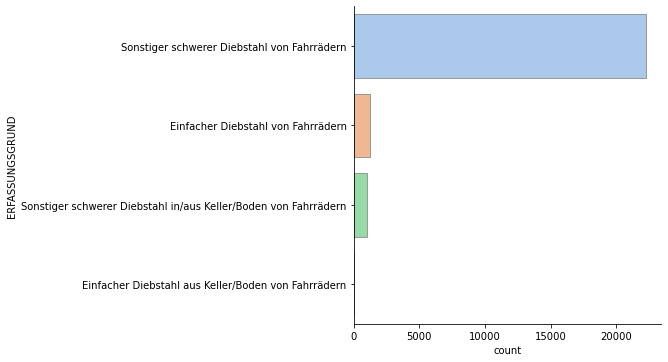

In [37]:
bike_thefts.plot_categoricals(df, 'ERFASSUNGSGRUND');

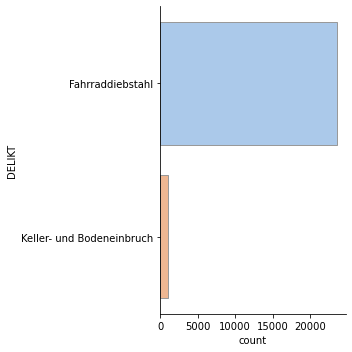

In [38]:
bike_thefts.plot_categoricals(df, 'DELIKT');

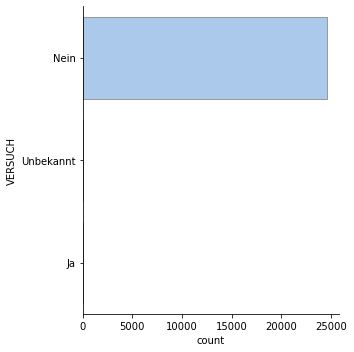

In [39]:
bike_thefts.plot_categoricals(df, 'VERSUCH');

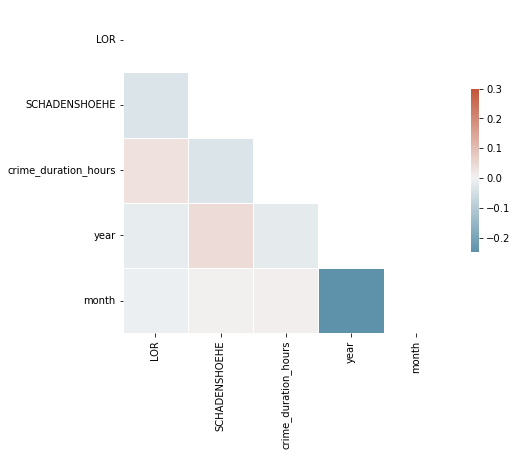

In [40]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=45)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5});